In [10]:
import math

# Data manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [11]:
# Loading the Data
cars_data_train = pd.read_csv('./datasets/cars_train.csv', sep=';', encoding='utf-8') # The EDA will be performed only in the training data

## Data Preparation

### First Glance at the Data

In [12]:
# Function to print information about the dataset
def data_overview(dataframe):
    print('> Data Overview\n')
    print('- Dataset shape: ', dataframe.shape, '\n')

    print('- Dimensions: ', dataframe.ndim, '\n')

    print('- Overall Information:')
    print(dataframe.info(verbose=True, show_counts=True), '\n')

    print('- Features Types:\n', dataframe.dtypes, '\n')

    print('- Duplicated Rows:\n', dataframe.duplicated().any(), '\n')

    print('- Unique Values:\n', dataframe.nunique(), '\n')

    print('- Missing Values:\n', dataframe.isnull().sum(), '\n')


In [13]:
# Making sense of the training data
data_overview(cars_data_train)

> Data Overview

- Dataset shape:  (29584, 29) 

- Dimensions:  2 

- Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null

- From the data overview, we can get the following insights about the training data:

  - Except for the variable 'hodometro' and 'preco', all the other variables can be represented by categories according to my interpretation. Therefore, labeled encoding, ordinal encoding, and one-hot encoding can be useful afterwards.
  - There aren't duplicated rows, which is good.
  - There are features with only one unique value, and there are missing values. - These must be treated.
  - About the specific features:

    - 'elegivel_revisao': has one unique value and no missing values. Therefore, this variable is useless regarding giving information to the future machine learning model.
    - 'veiulo_alienado': has no values at all. Therefore, it is also useless.
    - 'preco': the format is very weird. It needs to be converted to float.
    - The variables below have only one unique value and a considerable amount of missing values:
      - 'dono_aceita_troca'

      - 'veiculo_único_dono'

      - 'revisoes_concessionaria'

      - 'ipva_pago'

      - 'veiculo_licenciado'

      - 'garantia_de_fábrica'

      - 'revisoes_dentro_agenda'

      - These variables seem to be binary. Should we assume that the missing values are "not known" information and use them?
      - Some of them have a lot of missing values. Should we remove them?

- In summary the variables that needs to be evaluated:
  - ['elegivel_revisao', 'veiculo_alienado', 'revisoes_dentro_agenda', 'num_fotos', 'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica', 'preco']

### Useful Features & Handling Missing Values

In [14]:
# Removing the useless features
useless_features = ['id', 'elegivel_revisao', 'veiculo_alienado', 'revisoes_dentro_agenda'] # Due to a lot of missing values and lack of interpretability i decided to remove the revisoes_dentro_agenda variable
cars_data_train = cars_data_train.drop(columns=useless_features)

# Handling missing values
missing_cols = ['num_fotos', 'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica']

# Checking the % of missing values of each feature
print('> Percentage of missing values:')
for col in missing_cols:
  total_values_train = cars_data_train[col].size
  missing_values_train = cars_data_train[col].isnull().sum()
  ratio_train = (missing_values_train/total_values_train) * 100

  print(f'\t> {col}: {round(ratio_train, 2)}%')

# My guessing is that these variables are binary, except the num_fotos feature. So, filling the missing values with a 'unk' (unknown) string value seems to be fine
missing_cols = [x for x in missing_cols if x != 'num_fotos']

for col in missing_cols:
  cars_data_train[col].fillna('unk', inplace=True)

cars_data_train['num_fotos'].fillna(cars_data_train['num_fotos'].mean(), inplace=True) # Filling with the mean


> Percentage of missing values:
	> num_fotos: 0.6%
	> dono_aceita_troca: 25.9%
	> veiculo_único_dono: 64.77%
	> revisoes_concessionaria: 69.0%
	> ipva_pago: 33.55%
	> veiculo_licenciado: 46.23%
	> garantia_de_fábrica: 85.25%


In [15]:
# Making sense of the data
data_overview(cars_data_train)

> Data Overview

- Dataset shape:  (29584, 25) 

- Dimensions:  2 

- Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_fotos                29584 non-null  float64
 1   marca                    29584 non-null  object 
 2   modelo                   29584 non-null  object 
 3   versao                   29584 non-null  object 
 4   ano_de_fabricacao        29584 non-null  int64  
 5   ano_modelo               29584 non-null  float64
 6   hodometro                29584 non-null  float64
 7   cambio                   29584 non-null  object 
 8   num_portas               29584 non-null  int64  
 9   tipo                     29584 non-null  object 
 10  blindado                 29584 non-null  object 
 11  cor                      29584 non-null  object 
 12  tipo_vendedor            29584 non-null

### Features Types

In [16]:
# Types of features
features = cars_data_train.columns.tolist()
continuous_features = ['hodometro', 'preco'] # 2 Continuous Features
categorical_features = [x for x in features if x not in continuous_features] # 22 Categorical Features

# Converting the categorical features into categorical dtype
for var in categorical_features:
     cars_data_train[var] = cars_data_train[var].astype('category')

# Converting the preco variable to float
cars_data_train['preco'] = cars_data_train['preco'].str.replace('\.', '', regex=True).astype('float64') # 1st: Remove the dots from the variable and 2nd convert to float


In [18]:
# Making sense of the data
data_overview(cars_data_train)

> Data Overview

- Dataset shape:  (29584, 25) 

- Dimensions:  2 

- Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   num_fotos                29584 non-null  category
 1   marca                    29584 non-null  category
 2   modelo                   29584 non-null  category
 3   versao                   29584 non-null  category
 4   ano_de_fabricacao        29584 non-null  category
 5   ano_modelo               29584 non-null  category
 6   hodometro                29584 non-null  float64 
 7   cambio                   29584 non-null  category
 8   num_portas               29584 non-null  category
 9   tipo                     29584 non-null  category
 10  blindado                 29584 non-null  category
 11  cor                      29584 non-null  category
 12  tipo_vendedor            

## Exploratory Data Analysis (EDA)

### Univariate Analysis
- The features are divided into two different classes:
  - Continuous (numerical). Whose statistics are:
    - min and max: Minimum and Maximum values of the data
    - mean: Mean
    - std: Standard Deviation. Spread around the mean
    - Interquartile Range: Good for finding outliers

  - Categorical. Whose statistics are:
    - unique: Amount of unique values
    - top: Most frequent value
    - freq: Frequency of the top value

  - For both type of features the probability distributions were plotted
    - Note: In order to improve the visibility of the plots, the categorical features were converted to integers

In [17]:
# Analyzing featuress statistics
continuous_var_stats = cars_data_train[continuous_features].describe().T
categorical_var_stats = cars_data_train[categorical_features].describe().T

print('> Numerical Features:')
print(continuous_var_stats, '\n')
print('> Categorical Features:')
print(categorical_var_stats)

> Numerical Features:
             count          mean           std           min           25%  \
hodometro  29584.0  5.843059e+04  3.256177e+04  1.000000e+02  3.121400e+04   
preco      29584.0  1.002299e+16  9.547504e+15  2.006292e+10  3.196583e+15   

                    50%           75%           max  
hodometro  5.743400e+04  8.195350e+04  3.900650e+05  
preco      8.244891e+15  1.342533e+16  6.549912e+16   

> Categorical Features:
                           count unique  \
num_fotos                29584.0   15.0   
marca                      29584     40   
modelo                     29584    457   
versao                     29584   1916   
ano_de_fabricacao          29584     35   
ano_modelo               29584.0   17.0   
cambio                     29584      7   
num_portas                 29584      3   
tipo                       29584      7   
blindado                   29584      2   
cor                        29584      7   
tipo_vendedor              29584      2

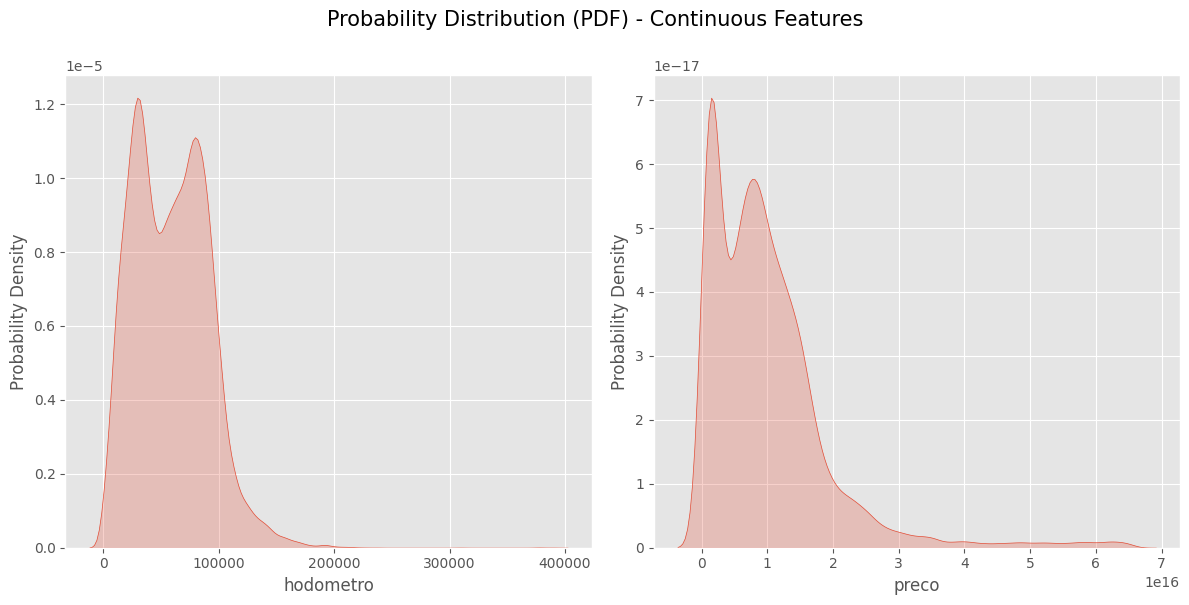

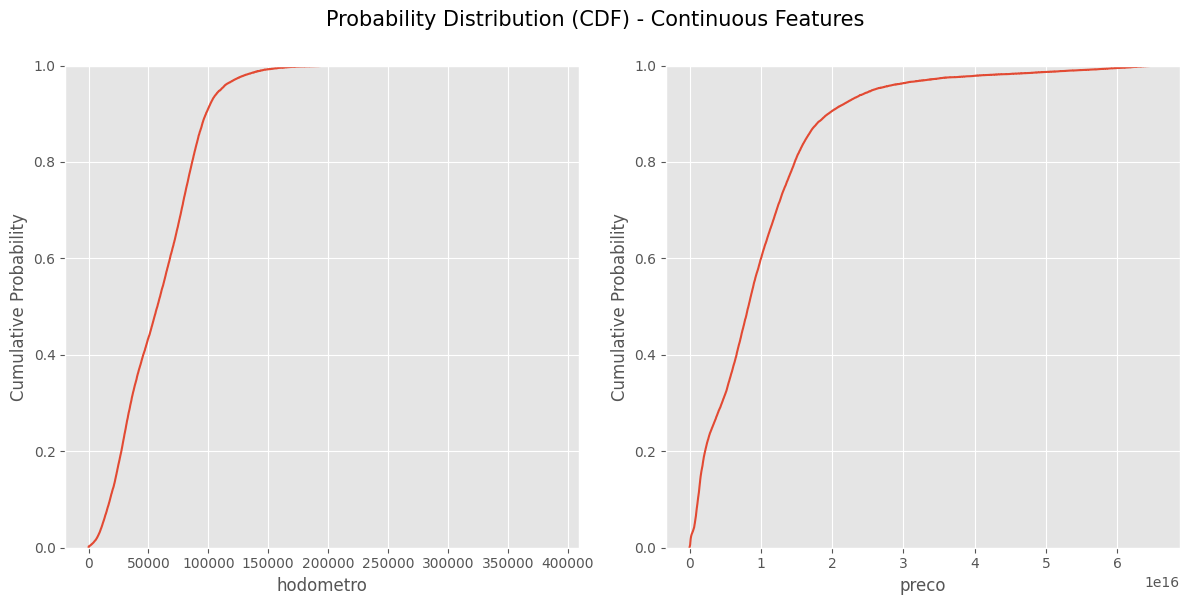

In [19]:
# Continuous features probability distributions
n_rows = 1
n_cols = 2
fig, axis = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 6))

for i in range(n_rows):
    for j in range(n_cols):
        idx = i * n_cols + j
        if idx < len(continuous_features):
            column = continuous_features[idx]
            sns.kdeplot(cars_data_train[column], fill=True, ax=axis[j])
            axis[j].set_xlabel(f'{column}', fontsize = 12)
            axis[j].set_ylabel('Probability Density', fontsize = 12)

fig.suptitle('Probability Distribution (PDF) - Continuous Features', fontsize=15, y=1.0)
fig.tight_layout()

fig_2, axis_2 = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 6))
for i in range(n_rows):
    for j in range(n_cols):
        idx = i * n_cols + j
        if idx < len(continuous_features):
            column = continuous_features[idx]
            sns.ecdfplot(cars_data_train[column], ax=axis_2[j])
            axis_2[j].set_xlabel(f'{column}', fontsize = 12)
            axis_2[j].set_ylabel('Cumulative Probability', fontsize = 12)

fig_2.suptitle('Probability Distribution (CDF) - Continuous Features', fontsize=15, y=1.0)
fig_2.tight_layout()

plt.show()

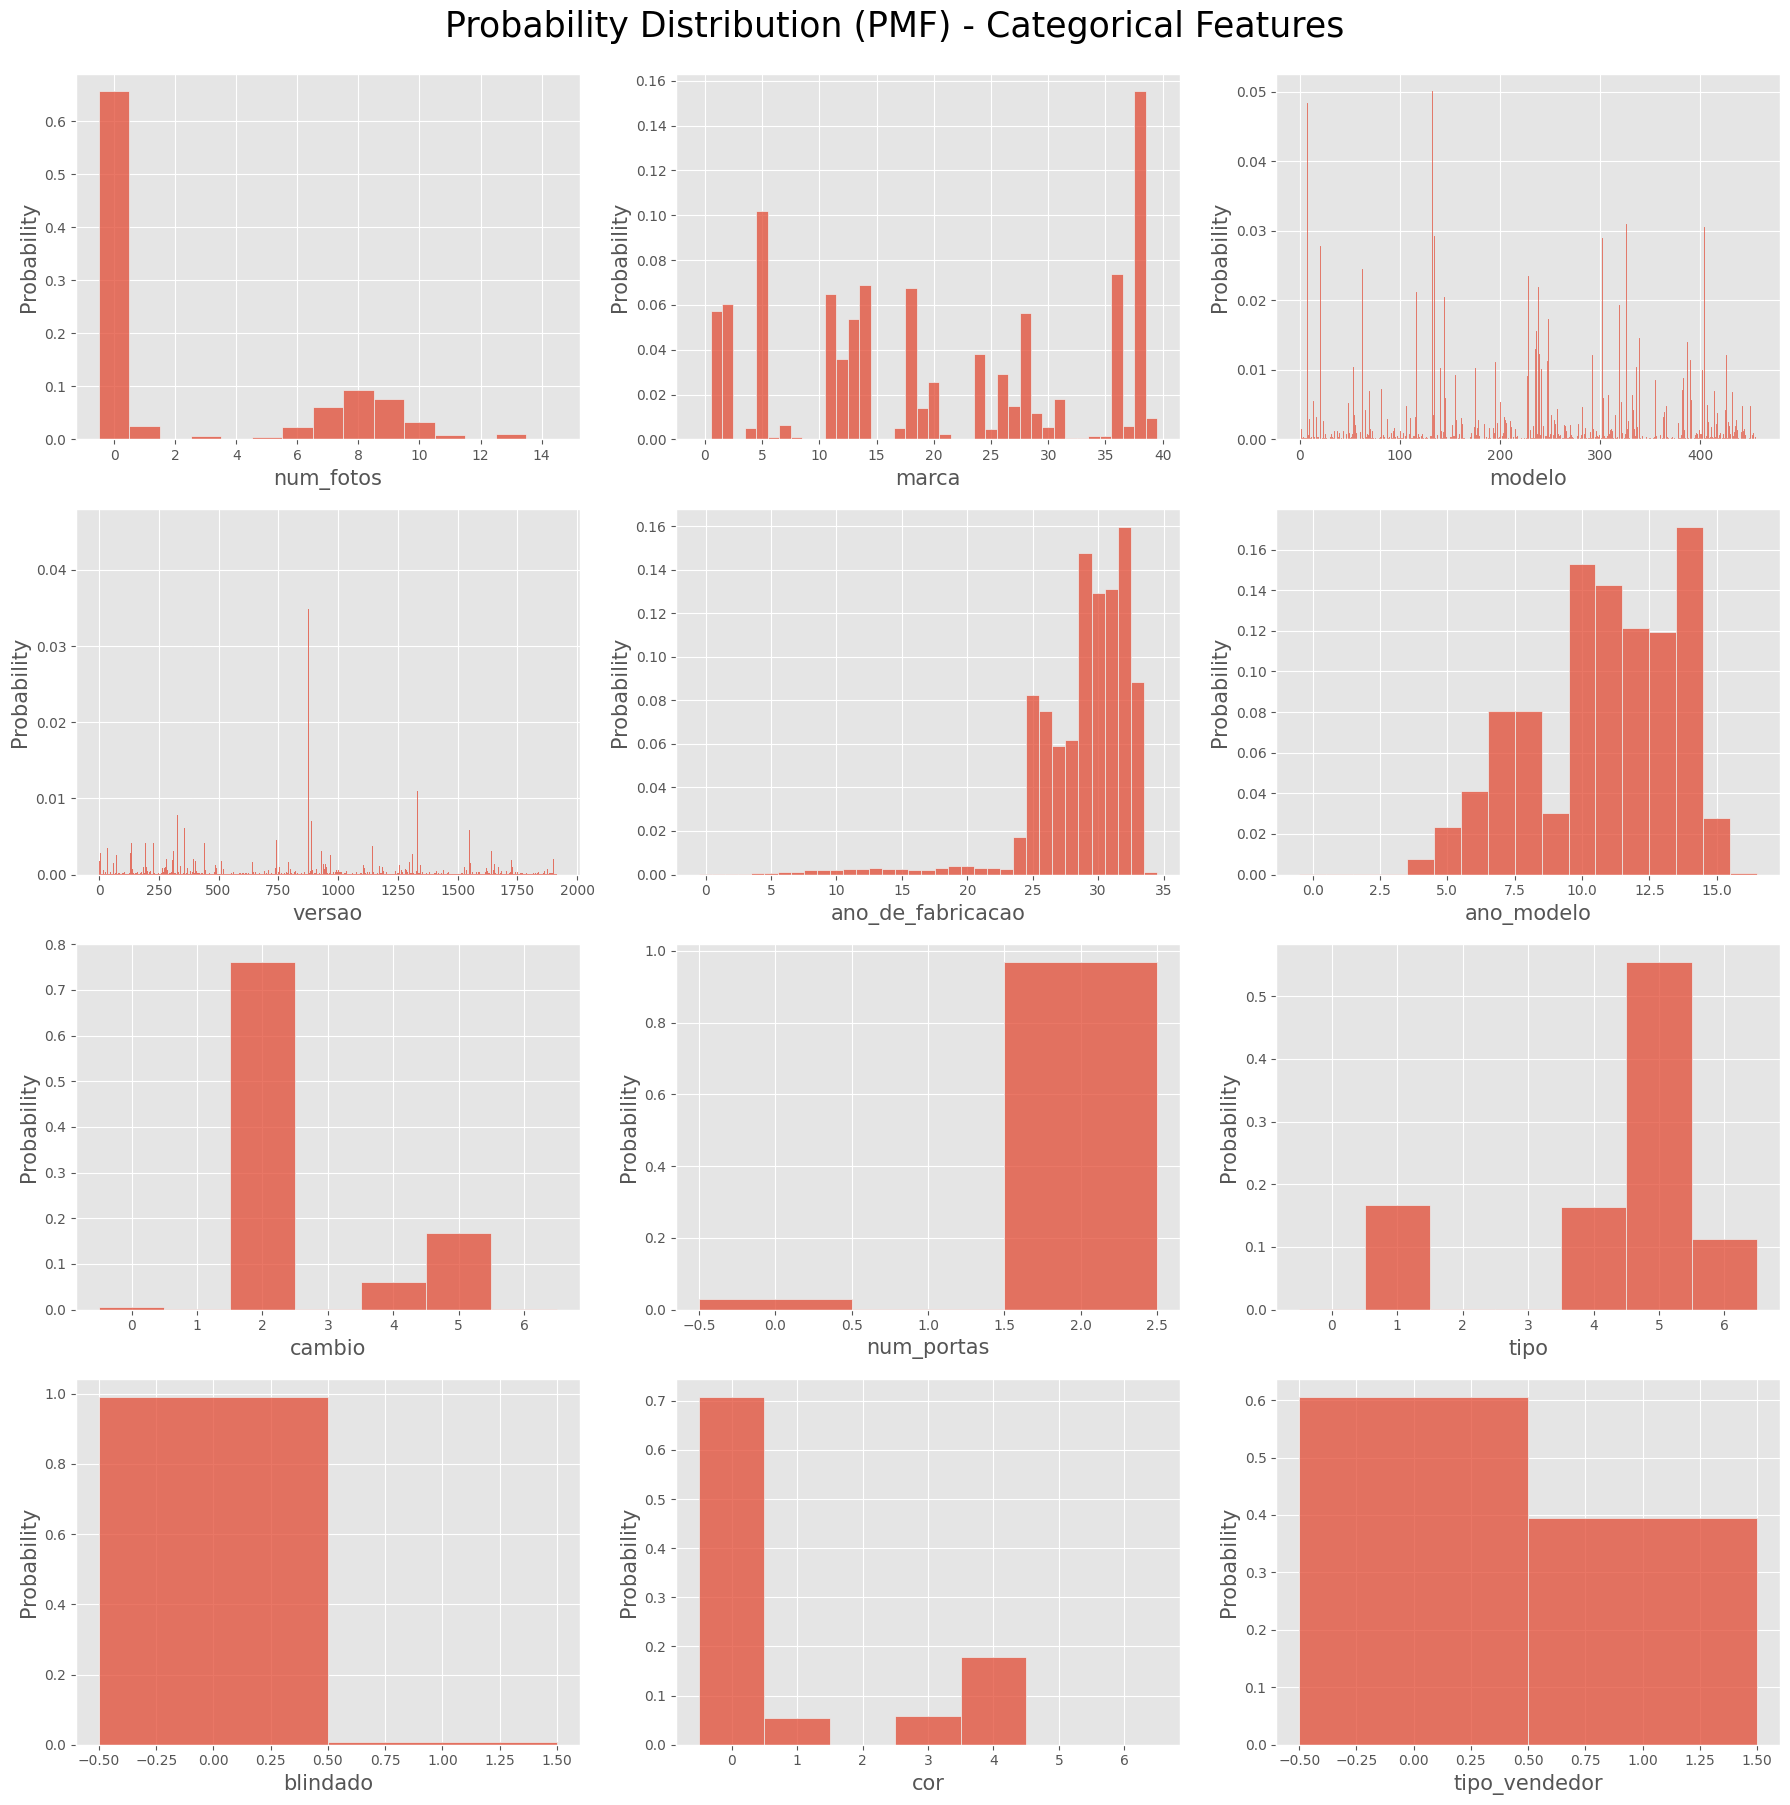

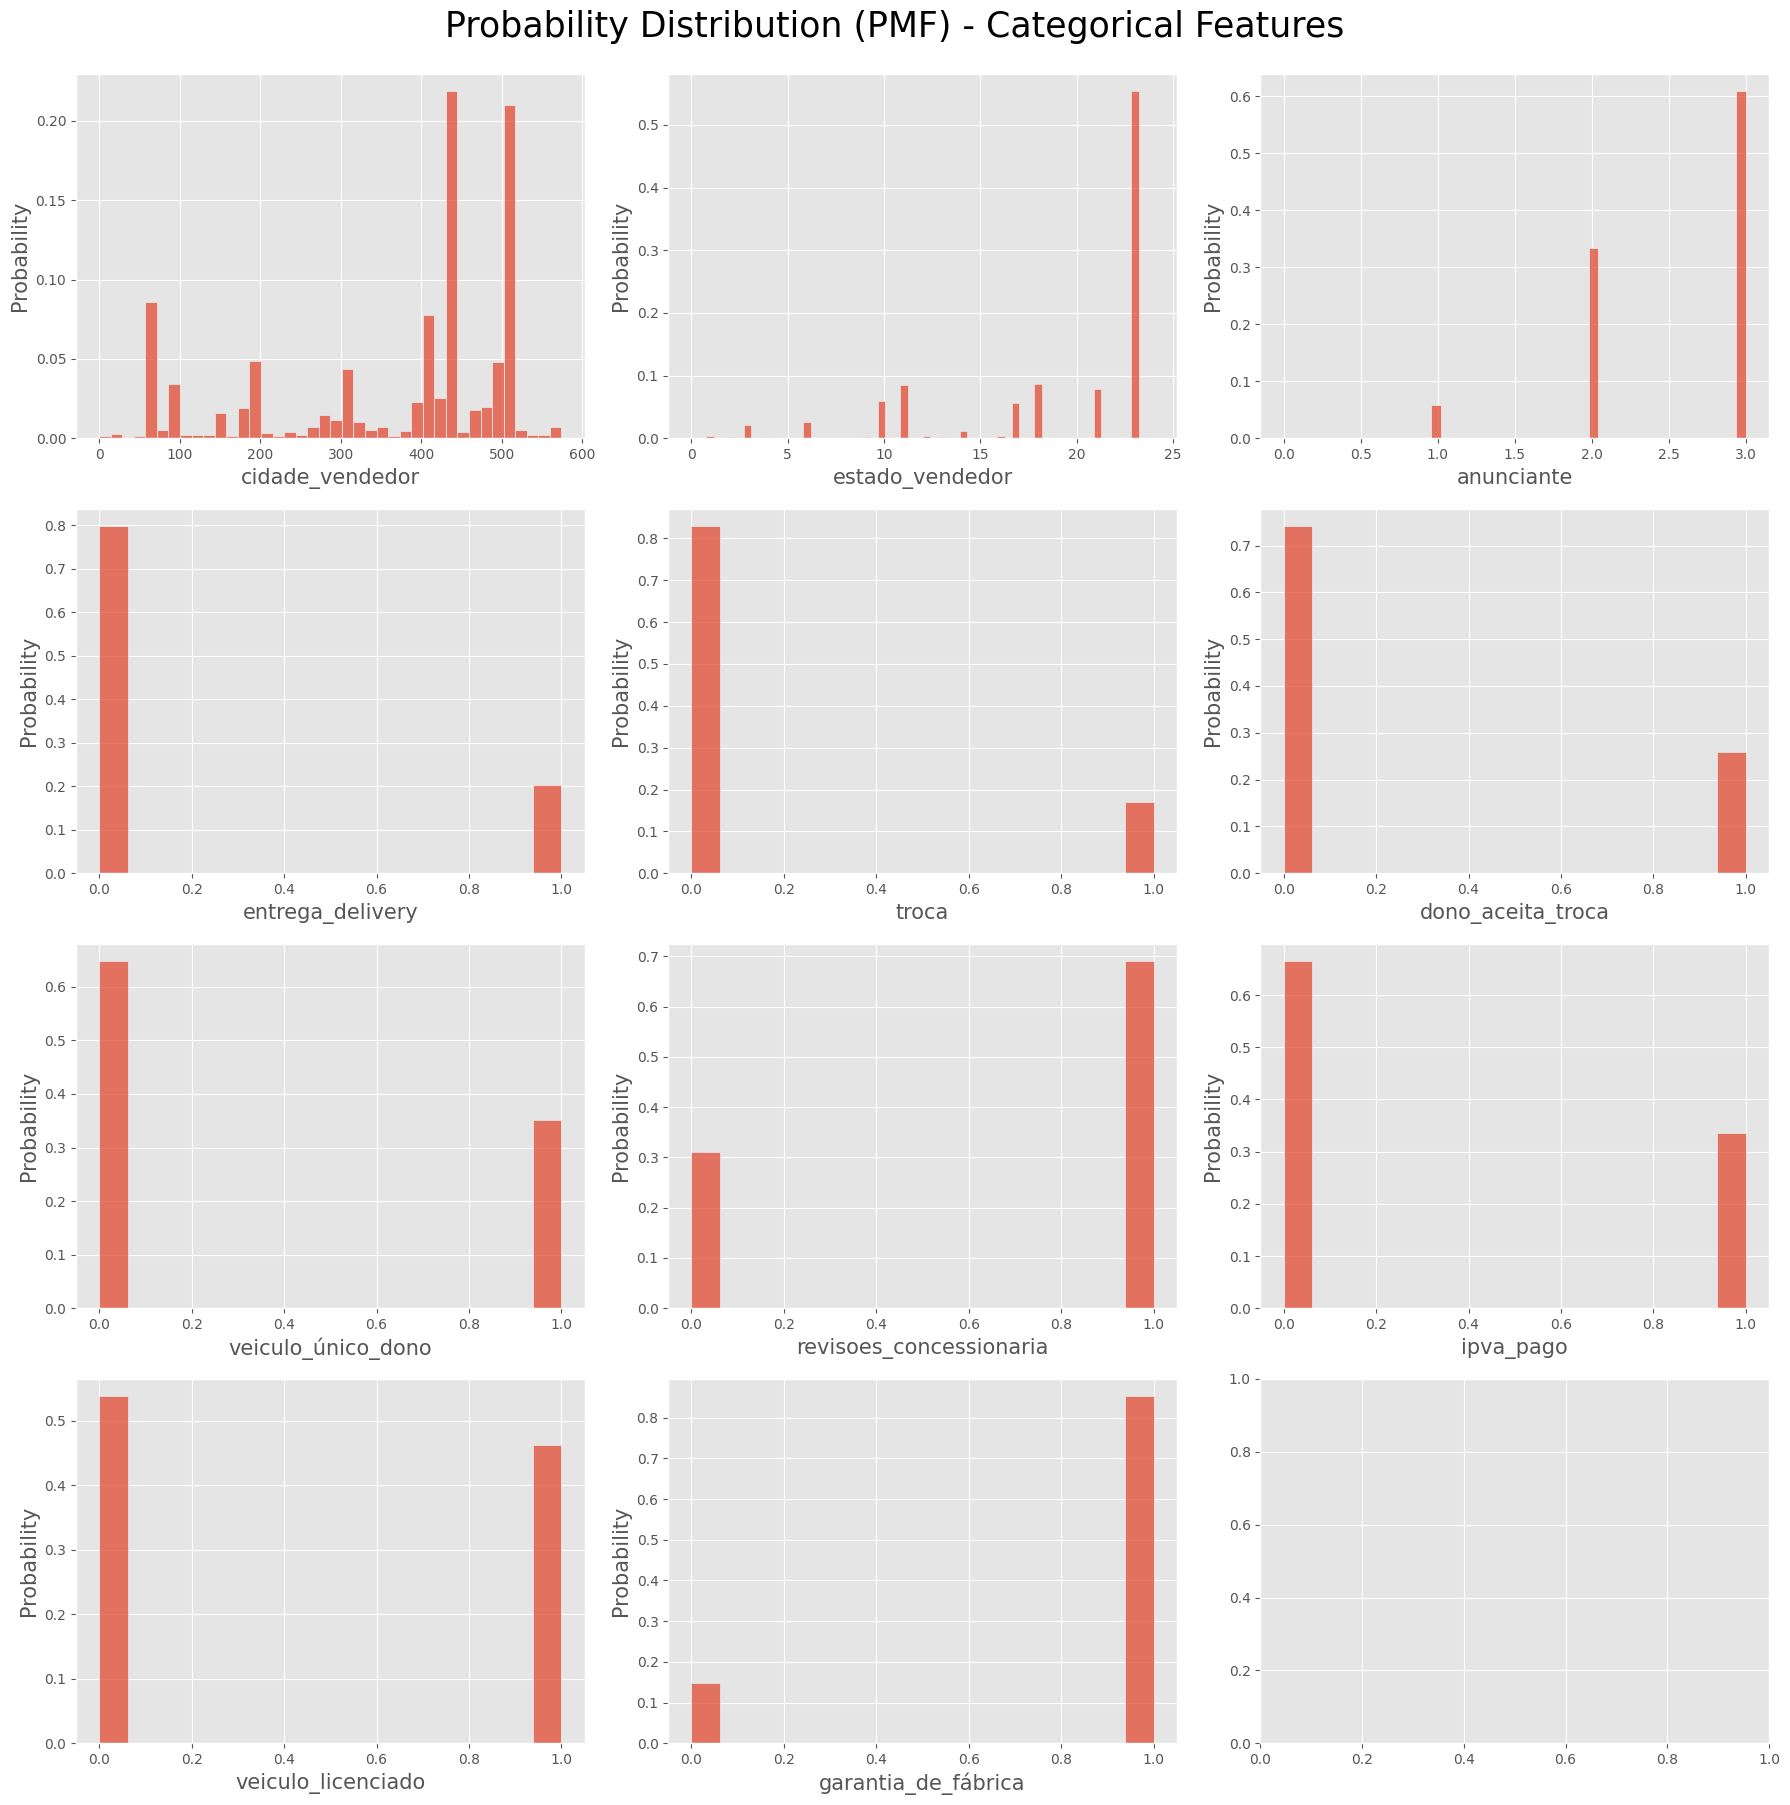

In [20]:
# Categorical features probability distributions
# In order to improve the visibility of the plots, the categorical features will be converted to integers
cars_data_train_temp = cars_data_train.copy()
for feature in categorical_features:
  cars_data_train_temp[feature] = cars_data_train_temp[feature].cat.codes

# The features
# Plotting from 1 - 12
n_rows = 4
n_cols = 3
fig, axis = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 18))

for i in range(n_rows):
    for j in range(n_cols):
        idx = i * n_cols + j
        if idx < len(categorical_features):
            column = categorical_features[idx]
            sns.histplot(cars_data_train_temp[column], stat='probability', ax=axis[i, j], discrete=True)
            axis[i, j].set_xlabel(f'{column}', fontsize = 15)
            axis[i, j].set_ylabel('Probability', fontsize = 15)

fig.suptitle('Probability Distribution (PMF) - Categorical Features', fontsize=25, y=1.0)
fig.tight_layout()

# Plotting from 12 - 23
n_rows = 4
n_cols = 3
fig_2, axis_2 = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 18))

for i in range(n_rows):
    for j in range(n_cols):
        idx = 12 + i * n_cols + j
        if idx < len(categorical_features):
            column = categorical_features[idx]
            sns.histplot(cars_data_train_temp[column], stat='probability', ax=axis_2[i, j])
            axis_2[i, j].set_xlabel(f'{column}', fontsize = 15)
            axis_2[i, j].set_ylabel('Probability', fontsize = 15)

fig_2.suptitle('Probability Distribution (PMF) - Categorical Features', fontsize=25, y=1.0)
fig_2.tight_layout()

plt.show()

num_fotos: Entropy = 1.900651786833276 | MaxEntropy = 3.9068905956085187
marca: Entropy = 4.154975681722572 | MaxEntropy = 5.321928094887363
modelo: Entropy = 6.846088490011113 | MaxEntropy = 8.83605035505807
versao: Entropy = 8.767491848488412 | MaxEntropy = 10.90388184573618
ano_de_fabricacao: Entropy = 3.491032075354258 | MaxEntropy = 5.129283016944966
ano_modelo: Entropy = 3.2501159305517677 | MaxEntropy = 4.087462841250339
cambio: Entropy = 1.0512986263137458 | MaxEntropy = 2.807354922057604
num_portas: Entropy = 0.1987813892586281 | MaxEntropy = 1.584962500721156
tipo: Entropy = 1.7046810240559565 | MaxEntropy = 2.807354922057604
blindado: Entropy = 0.06987125275690761 | MaxEntropy = 1.0
cor: Entropy = 1.2687023378670568 | MaxEntropy = 2.807354922057604
tipo_vendedor: Entropy = 0.9673723961694769 | MaxEntropy = 1.0
cidade_vendedor: Entropy = 4.693822213349731 | MaxEntropy = 9.167418145831737
estado_vendedor: Entropy = 2.3757474137011454 | MaxEntropy = 4.643856189774724
anunciante

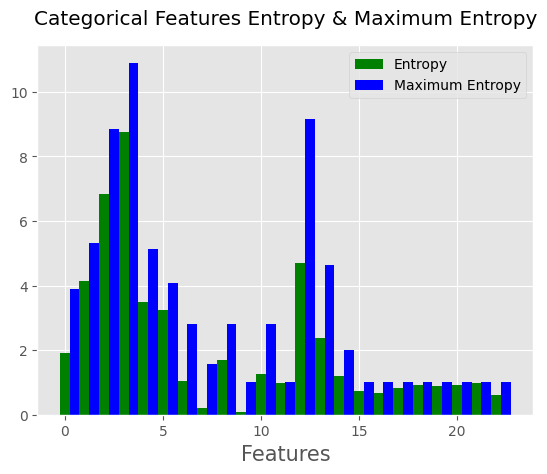


Variables with low entropy:
['blindado']


In [21]:
# Calculating the categorical variables entropy, Entropy = -sum(p * log2(p))
total_samples = len(cars_data_train)
threshold = 0.1 # low entropy implies less than 10% of the maximum entropy
low_entropy_var = []
entropies = []
max_entropies = []
for col in categorical_features:
    category_counts = cars_data_train[col].value_counts() # amount of data points of unique categories
    category_probabilities = category_counts / total_samples
    max_entropy = math.log2(len(category_counts))
    entropy = - (category_probabilities * category_probabilities.apply(math.log2)).sum()

    if entropy / max_entropy < threshold:
        low_entropy_var.append(col)
    entropies.append(entropy)
    max_entropies.append(max_entropy)
    print(f'{col}: Entropy = {entropy} | MaxEntropy = {max_entropy}')

print('\n')
# Plotting the categorical variables entropies as well as their maximum entropy values
bar_width = 0.5
n_bar_1 = list(range(len(categorical_features)))
n_bar_2 = [n_bar_1[i] + bar_width for i in range(len(n_bar_1))]

plt.bar(n_bar_1, entropies, width=0.5, color='green', label='Entropy')
plt.bar(n_bar_2, max_entropies, width=0.5, color='blue', label='Maximum Entropy')
plt.xlabel('Features', fontsize=15)
plt.legend()
plt.title('Categorical Features Entropy & Maximum Entropy', pad=15)
plt.show()

print('\nVariables with low entropy:')
print(low_entropy_var)

## Business Questions
    - Core Questions
      a. What is the best state registered in the database to sell a popular brand car and why?
      b. What is the best state to buy a pickup truck with an automatic transmission and why?
      c. What is the best state to buy cars that are still under factory warranty and why?
    - Extra Questions:
      d. What is the sales percentage of seller types?
      e. What is the advertiser's percentage of sales?
      f. What is the percentage of sales by color?

    - Answers:
      a. There are three alternatives:
        > Choose the state with more sales
        > Choose the state with the highest mean sale price
        > Trying to find the balance between the aforementioned alternatives that is more profitable.
      b.
        > Find the state that sells pickup trucks with automatic transmission at the lowest mean price possible.
      c.
        > Find the state that sells cars under factory warranty at the lowest mean price possible
      d.
        > Just calculates the percentages of each category of seller types.
      e.
        > Just calculates the percentages of each category of advertisers.
      f.
        > Just calculates the percentages of each category of colors.
      




In [22]:
# Question a.
# List of possible states
states_list = cars_data_train.loc[cars_data_train['marca'] == 'VOLKSWAGEN', 'estado_vendedor']

# Finding the state with the highest number of VOLKSWAGEN sales
state_with_most_sales = states_list.value_counts().idxmax()

# Filtering the DataFrame for rows where 'marca' is 'VOLKSWAGEN' and the 'estado_vendedor' is in the list of states
states_list = states_list.unique()
volkswagen_states = cars_data_train.loc[cars_data_train['estado_vendedor'].isin(states_list) & (cars_data_train['marca'] == 'VOLKSWAGEN')]

# Grouping by 'estado_vendedor' and calculating the mean price for each state
mean_prices_by_state = volkswagen_states.groupby(['estado_vendedor'])['preco'].mean()

# Sorting the mean prices in descending order
mean_prices_by_state_sorted = mean_prices_by_state.sort_values(ascending=False)

print('State with highest number of VOLKSWAGEN sales: ', state_with_most_sales)
print('State with the highest mean selling price: ', mean_prices_by_state_sorted.index[0])


State with highest number of VOLKSWAGEN sales:  São Paulo (SP)
State with the highest mean selling price:  Amazonas (AM)


In [24]:
# Question b.
# List of possible states
states_list = cars_data_train.loc[(cars_data_train['tipo'] == 'picape') & (cars_data_train['cambio'] == 'Automática'), 'estado_vendedor']

# Filtering the DataFrame for rows where 'tipo' is 'picape' and 'cambio' is 'Automática' and the 'estado_vendedor' is in the list of states
states_list = states_list.unique()
automatic_pickup_states = cars_data_train.loc[(cars_data_train['estado_vendedor'].isin(states_list)) & (cars_data_train['tipo'] == 'picape') & (cars_data_train['cambio'] == 'Automática')]

# Grouping by 'estado_vendedor' and calculating the mean price for each state
mean_prices_by_state = automatic_pickup_states.groupby(['estado_vendedor'])['preco'].mean()

# Sorting the mean prices in descending order
mean_prices_by_state_sorted = mean_prices_by_state.sort_values(ascending=True)

print('State with the lowest mean price: ', mean_prices_by_state_sorted.index[0])


State with the lowest mean price:  Acre (AC)


In [25]:
# Question c.
# List of possible states
states_list = cars_data_train.loc[cars_data_train['garantia_de_fábrica'] != 'unk', 'estado_vendedor']

# Filtering the DataFrame for rows where 'garantia_de_fábrica' is different from 'unk' and the 'estado_vendedor' is in the list of states
states_list = states_list.unique()
cars_warranty_states = cars_data_train.loc[(cars_data_train['estado_vendedor'].isin(states_list)) & (cars_data_train['garantia_de_fábrica'] != 'unk')]

# Grouping by 'estado_vendedor' and calculating the mean price for each state
mean_prices_by_state = cars_warranty_states.groupby(['estado_vendedor'])['preco'].mean()

# Sorting the mean prices in descending order
mean_prices_by_state_sorted = mean_prices_by_state.sort_values(ascending=True)

print('State with the lowest mean price: ', mean_prices_by_state_sorted.index[0])

State with the lowest mean price:  Ceará (CE)


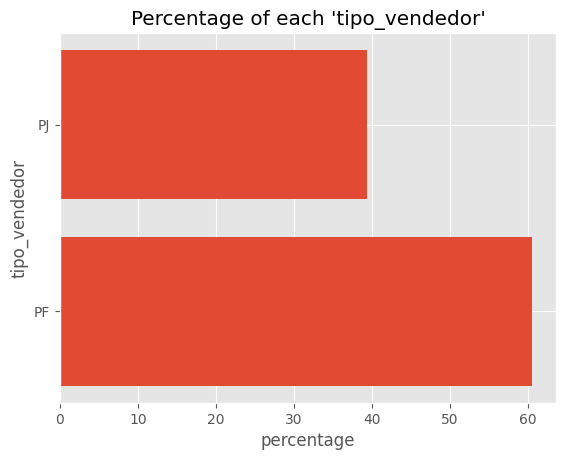

tipo_vendedor
PF    60.59
PJ    39.41
Name: count, dtype: float64 



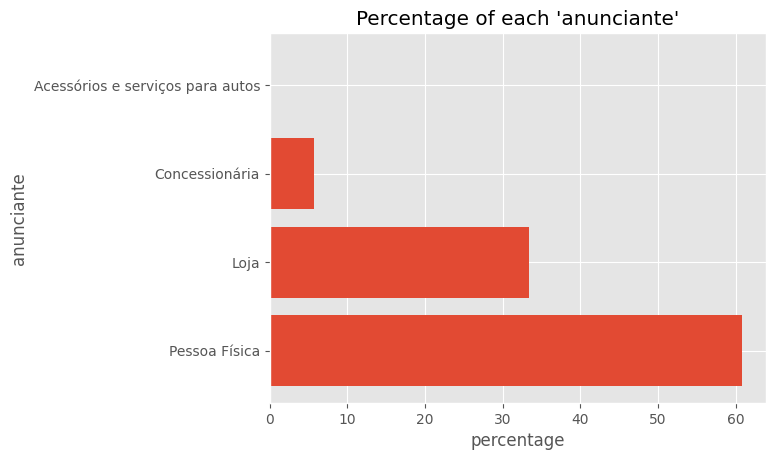

anunciante
Pessoa Física                       60.84
Loja                                33.39
Concessionária                       5.75
Acessórios e serviços para autos     0.01
Name: count, dtype: float64 



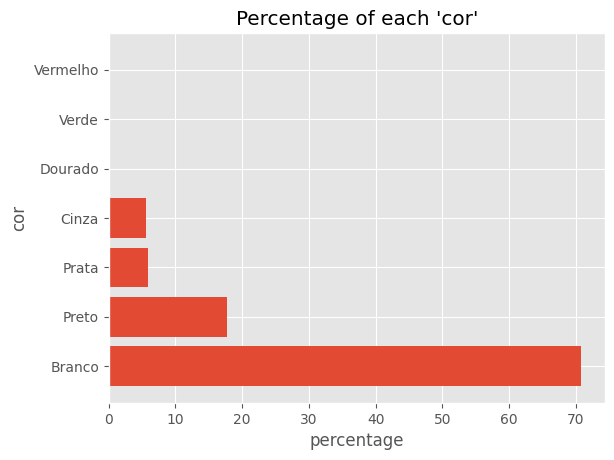

cor
Branco      70.81
Preto       17.77
Prata        5.88
Cinza        5.52
Dourado      0.01
Verde        0.00
Vermelho     0.00
Name: count, dtype: float64


In [26]:
# Calculate the total number of rows in the DataFrame
total_rows = len(cars_data_train)

# Question d.
# Calculate the value counts for each category
tipo_vendedor_counts = cars_data_train['tipo_vendedor'].value_counts()

# Calculate the percentage of each category
tipo_vendedor_percentage = round((tipo_vendedor_counts / total_rows) * 100, 2)

# Plotting the horizontal bar chart
plt.barh(tipo_vendedor_percentage.index, tipo_vendedor_percentage.values)
plt.xlabel('percentage')
plt.ylabel('tipo_vendedor')
plt.title("Percentage of each 'tipo_vendedor'")
plt.show()

print(tipo_vendedor_percentage, '\n')

# Question e.
# Calculate the value counts for each category
anunciante_counts = cars_data_train['anunciante'].value_counts()

# Calculate the percentage of each category
anunciante_percentage = round((anunciante_counts / total_rows) * 100, 2)

# Plotting the horizontal bar chart
plt.barh(anunciante_percentage.index, anunciante_percentage.values)
plt.xlabel('percentage')
plt.ylabel('anunciante')
plt.title("Percentage of each 'anunciante'")
plt.show()

print(anunciante_percentage, '\n')

# Question f.
# Calculate the value counts for each category
cor_counts = cars_data_train['cor'].value_counts()

# Calculate the percentage of each category
cor_percentage = round((cor_counts / total_rows) * 100, 2)

# Plotting the horizontal bar chart
plt.barh(cor_percentage.index, cor_percentage.values)
plt.xlabel('percentage')
plt.ylabel('cor')
plt.title("Percentage of each 'cor'")
plt.show()

print(cor_percentage)